## Fig 1f-e

### Protein. Bone Marrow (BM) + Spleen (SPL) 
### ADT QC steps + DSB + filtering clusters + differentially expressed proteins
---
##### mq224

Date: 2021-01-19

In [2]:
#SETTING ENVIRONMENT 
import rpy2

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

/usr/local/lib/python3.7/dist-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()


In [3]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

### Read protein data 

In [3]:
DSB_output0 = sc.read("h5ad_part2/20210119_Laurenti_mq224_ADT_postQC_filtered_DSB_FDG_BM_SPL_SIGAB11_SIGAD11.h5ad")

In [4]:
DSB_output0

AnnData object with n_obs × n_vars = 29463 × 198
    obs: 'Tissue', 'batch', 'leiden', 'louvain'
    var: 'bg_mean'
    uns: 'draw_graph', 'leiden', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Import UMAP coordinates for downstream analysis

In [5]:
UMAP_metadata = pd.read_csv("/home/mq224/rds/rds-bg200-hphi-gottgens/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Laurenti_Lab/Data/Paper_landscape/20210119_DONOR4_FILTERED_metadata_and_UMAP_coords.txt", sep='\t')

UMAP_metadata = pd.DataFrame(UMAP_metadata)
UMAP_metadata.index = UMAP_metadata["Unnamed: 0"]
UMAP_metadata["Tissue"] = UMAP_metadata["organ"]  
meta_SPL = UMAP_metadata.groupby(UMAP_metadata.Tissue)
meta_SPL = meta_SPL.get_group("SPL")
meta_BM = UMAP_metadata.groupby(UMAP_metadata.Tissue)
meta_BM = meta_BM.get_group("BM")

In [6]:
meta_BM

,Unnamed: 0,donor,organ,leiden.1.2,UMAP1,UMAP2,Tissue
Unnamed: 0,,,,,,,
_04_AAACCCAAGATGTTCC.1.1,_04_AAACCCAAGATGTTCC.1.1,DOD4,BM,5,4.111079,-0.652511,BM
_04_AAACCCACAATACAGA.1.1,_04_AAACCCACAATACAGA.1.1,DOD4,BM,5,1.707621,0.818390,BM
_04_AAACCCACATGCAGCC.1.1,_04_AAACCCACATGCAGCC.1.1,DOD4,BM,9,-3.662930,2.346038,BM
_04_AAACCCAGTAAGATAC.1.1,_04_AAACCCAGTAAGATAC.1.1,DOD4,BM,4,3.432608,-0.470582,BM
_04_AAACCCATCCTAAACG.1.1,_04_AAACCCATCCTAAACG.1.1,DOD4,BM,5,3.038578,-0.421665,BM
...,...,...,...,...,...,...,...
_04_TTTGTTGGTCGCAGTC.1.1,_04_TTTGTTGGTCGCAGTC.1.1,DOD4,BM,9,-3.208073,2.892728,BM
_04_TTTGTTGGTGTATCCA.1.1,_04_TTTGTTGGTGTATCCA.1.1,DOD4,BM,15,-6.174711,3.993271,BM
_04_TTTGTTGTCGAAACAA.1.1,_04_TTTGTTGTCGAAACAA.1.1,DOD4,BM,8,1.648200,10.642785,BM


In [7]:
meta_SPL

,Unnamed: 0,donor,organ,leiden.1.2,UMAP1,UMAP2,Tissue
Unnamed: 0,,,,,,,
_04_AAACCCAAGAACGTGC.1.3,_04_AAACCCAAGAACGTGC.1.3,DOD4,SPL,0,-1.334311,-1.583304,SPL
_04_AAACCCAAGCGCTGCT.1.3,_04_AAACCCAAGCGCTGCT.1.3,DOD4,SPL,0,0.888128,-2.784225,SPL
_04_AAACCCAAGCGTCAAG.1.3,_04_AAACCCAAGCGTCAAG.1.3,DOD4,SPL,14,2.744651,-1.591141,SPL
_04_AAACCCAAGGAACGTC.1.3,_04_AAACCCAAGGAACGTC.1.3,DOD4,SPL,11,-0.878048,0.252379,SPL
_04_AAACCCAAGGGTTTCT.1.3,_04_AAACCCAAGGGTTTCT.1.3,DOD4,SPL,9,-3.052631,5.249128,SPL
...,...,...,...,...,...,...,...
_04_TTTGTTGGTGCATGAG.1.3,_04_TTTGTTGGTGCATGAG.1.3,DOD4,SPL,11,-0.025106,-1.068525,SPL
_04_TTTGTTGGTGGACTAG.1.3,_04_TTTGTTGGTGGACTAG.1.3,DOD4,SPL,2,1.810314,8.247756,SPL
_04_TTTGTTGGTTGCAACT.1.3,_04_TTTGTTGGTTGCAACT.1.3,DOD4,SPL,14,-0.350354,-3.384986,SPL


In [8]:
cells1 = pd.Index(meta_BM["Unnamed: 0"]).astype(str)
cells2 = pd.Index(meta_SPL["Unnamed: 0"]).astype(str)

In [9]:
#for BM
new1 =[]
for cell in cells1:
    cell = cell.replace('_04_',"")
    cell = cell.replace('.1',"")
    new1.append(cell)
    
new1 = pd.Index([x+"-0" for x in new1])

In [10]:
#for SPL
new2 =[]
for cell in cells2:
    cell = cell.replace('_04_',"")
    cell = cell.replace('.1',"")
    new2.append(cell)

new2 = pd.Index([x[:-2] for x in new2])
new2 = pd.Index([x+"-1" for x in new2])

In [11]:
meta_BM.index = new1
meta_SPL.index= new2

In [12]:
len("AAACCCAAGATGTTCC-1")
len("AAACCCAAGAACGTGC-2")

18

In [13]:
meta_BM

,Unnamed: 0,donor,organ,leiden.1.2,UMAP1,UMAP2,Tissue
AAACCCAAGATGTTCC-0,_04_AAACCCAAGATGTTCC.1.1,DOD4,BM,5,4.111079,-0.652511,BM
AAACCCACAATACAGA-0,_04_AAACCCACAATACAGA.1.1,DOD4,BM,5,1.707621,0.818390,BM
AAACCCACATGCAGCC-0,_04_AAACCCACATGCAGCC.1.1,DOD4,BM,9,-3.662930,2.346038,BM
AAACCCAGTAAGATAC-0,_04_AAACCCAGTAAGATAC.1.1,DOD4,BM,4,3.432608,-0.470582,BM
AAACCCATCCTAAACG-0,_04_AAACCCATCCTAAACG.1.1,DOD4,BM,5,3.038578,-0.421665,BM
...,...,...,...,...,...,...,...
TTTGTTGGTCGCAGTC-0,_04_TTTGTTGGTCGCAGTC.1.1,DOD4,BM,9,-3.208073,2.892728,BM
TTTGTTGGTGTATCCA-0,_04_TTTGTTGGTGTATCCA.1.1,DOD4,BM,15,-6.174711,3.993271,BM
TTTGTTGTCGAAACAA-0,_04_TTTGTTGTCGAAACAA.1.1,DOD4,BM,8,1.648200,10.642785,BM
TTTGTTGTCTCGAACA-0,_04_TTTGTTGTCTCGAACA.1.1,DOD4,BM,16,-4.971990,5.587547,BM


In [14]:
meta_SPL

,Unnamed: 0,donor,organ,leiden.1.2,UMAP1,UMAP2,Tissue
AAACCCAAGAACGTGC-1,_04_AAACCCAAGAACGTGC.1.3,DOD4,SPL,0,-1.334311,-1.583304,SPL
AAACCCAAGCGCTGCT-1,_04_AAACCCAAGCGCTGCT.1.3,DOD4,SPL,0,0.888128,-2.784225,SPL
AAACCCAAGCGTCAAG-1,_04_AAACCCAAGCGTCAAG.1.3,DOD4,SPL,14,2.744651,-1.591141,SPL
AAACCCAAGGAACGTC-1,_04_AAACCCAAGGAACGTC.1.3,DOD4,SPL,11,-0.878048,0.252379,SPL
AAACCCAAGGGTTTCT-1,_04_AAACCCAAGGGTTTCT.1.3,DOD4,SPL,9,-3.052631,5.249128,SPL
...,...,...,...,...,...,...,...
TTTGTTGGTGCATGAG-1,_04_TTTGTTGGTGCATGAG.1.3,DOD4,SPL,11,-0.025106,-1.068525,SPL
TTTGTTGGTGGACTAG-1,_04_TTTGTTGGTGGACTAG.1.3,DOD4,SPL,2,1.810314,8.247756,SPL
TTTGTTGGTTGCAACT-1,_04_TTTGTTGGTTGCAACT.1.3,DOD4,SPL,14,-0.350354,-3.384986,SPL
TTTGTTGTCACTACTT-1,_04_TTTGTTGTCACTACTT.1.3,DOD4,SPL,3,-0.585242,-11.140257,SPL


In [15]:
meta_BM_SPL= pd.concat([meta_BM, meta_SPL], join="inner")

In [16]:
DSB_output0.obs_names

Index(['TCCCATGAGTCATGGG-0', 'TTGATGGAGAAACTCA-0', 'ATCATTCCACCATATG-0',
       'TCTATACCAGCTATTG-0', 'GGGCCATCAAATGGAT-0', 'CAACGGCCACTCCGGA-0',
       'ACGGTCGCATAATGCC-0', 'CACAGATGTCGCAACC-0', 'AAGACAAAGCCTCTCT-0',
       'CGGGCATTCAAGGCTT-0',
       ...
       'TGCTCCATCAACGCTA-1', 'AGATCCATCGTGTGGC-1', 'TTGCATTTCCATCTCG-1',
       'TCCATGCAGCCATTCA-1', 'TAAGCACAGCGAGTCA-1', 'GGAGGTAAGGTTCATC-1',
       'GCCAGCATCAGCGCGT-1', 'TGCGGCAGTGATGAAT-1', 'TAGGTTGAGATGTTCC-1',
       'CAAGAGGCAGTCGAGA-1'],
      dtype='object', length=29463)

In [17]:
# get the overlapping genes between mRNA and AB
OL1 = np.intersect1d(meta_BM_SPL.index, DSB_output0.obs_names)
print(len(OL1))

24322


In [18]:
len(np.unique(list(OL1)))

24322

In [19]:
len(np.unique(DSB_output0.obs_names))

29463

In [20]:
DSB_output0 = DSB_output0[OL1,:].copy()

In [21]:
meta_BM_SPL = meta_BM_SPL.loc[OL1,:]

In [22]:
DSB_output0.obsm["X_umap"] = meta_BM_SPL[["UMAP1","UMAP2"]].values
DSB_output0.obs["leiden.1.2"] = meta_BM_SPL["leiden.1.2"].astype('category')
DSB_output0.obs["Annotations.1.2"] = meta_BM_SPL["leiden.1.2"].astype('category')

In [23]:
np.unique(DSB_output0.obs["leiden.1.2"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 21, 22, 23, 24])

In [24]:
new_cluster_names =["CL0_HSC/MPP2","CL1_LyP2","CL2_MEP2","CL3_LyP3","CL4_HSC/MPP1",
 "CL5_HSC/MPP3","CL6_MyP1","CL7_HSC/MPP to CMP","CL8_late EryP","CL9_MyP2","CL10_HSC/MPP to MEP","CL11_HSC/MPP4",
 "CL12_MEP1","CL13_MEP cycling","CL14_ND","CL15_MyP4 (GMP)","CL16_MyP3 (cycling)","CL17_EoBasoMCP","CL18_LyP1",
 "CL19_cycling prog. (Ery/My)","CL21_HSC/MPP5","CL22_MkP","CL23_EryP/MyP mix","CL24_MDP"]

DSB_output0.rename_categories('Annotations.1.2', new_cluster_names)

In [25]:
HSCs=["CD34", "CD38", "CD45RA", "CD90", "CD49f", "CD123", "CD117", "CD133", "CD10", "CD7"]

In [26]:
DSB_output0.obs

,Tissue,batch,leiden,louvain,leiden.1.2,Annotations.1.2
AAACCCAAGAACGTGC-1,SPL,1,0,0,0,CL0_HSC/MPP2
AAACCCAAGATGTTCC-0,BM,0,4,3,5,CL5_HSC/MPP3
AAACCCAAGCGCTGCT-1,SPL,1,0,0,0,CL0_HSC/MPP2
AAACCCAAGCGTCAAG-1,SPL,1,6,6,14,CL14_ND
AAACCCAAGGAACGTC-1,SPL,1,1,2,11,CL11_HSC/MPP4
...,...,...,...,...,...,...
TTTGTTGTCACTACTT-1,SPL,1,5,5,3,CL3_LyP3
TTTGTTGTCACTTCTA-1,SPL,1,5,5,1,CL1_LyP2
TTTGTTGTCGAAACAA-0,BM,0,2,1,8,CL8_late EryP
TTTGTTGTCTCGAACA-0,BM,0,1,5,16,CL16_MyP3 (cycling)


In [27]:
DSB_output0_BM =  DSB_output0[DSB_output0.obs['Tissue'].isin(['BM']),:]
DSB_output0_SPL=  DSB_output0[DSB_output0.obs['Tissue'].isin(['SPL']),:]

In [28]:
DSB_output0_BM.obs["leiden.1.2"] = DSB_output0_BM.obs["leiden.1.2"]
DSB_output0_SPL.obs["leiden.1.2"] = DSB_output0_SPL.obs["leiden.1.2"]

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [34]:
DSB_output0.write("h5ad_part3/20210119_Laurenti_mq224_ADT_postQC_filtered_DSB_UMAPpaper_BM_SPL_SIGAB11_SIGAD11.h5ad")

In [40]:
import pandas as pd
file_name = "/home/mq224/rds/rds-bg200-hphi-gottgens/users/mq224/project_citeseq/part2citeseq/PhD/Year_1/Collaborations/Laurenti_Lab/Data/20210122_protein_markers_for_anno_Fig1_v2.xlsx"
df = pd.read_excel(file_name)
del df["Unnamed: 2"]
print(df.head())

  protein marker  population
0           CD34        HSPC
1           CD38         HSC
2           CD90         HSC
3          CD49f         HSC
4         CD110   HSC/MEP/MK


In [41]:
df["protein marker"] = ['CD34',
 'CD38',
 'CD90',
 'CD49f',
 'CD110',
 'CD201',
 'CD99',
 'CD69',
 'CD117',
 'CD164',
 'CD184',
 'CD35',
 'CD326',
 'CD36',
 'CD273',
 'CD131',
 'CD71',
 'CD41',
 'CD61',
 'CD62P',
 'CD9',
 'Fc_epsilon',
 'CD135',
 'CD33',
 'CD275',
 'CD13',
 'CD371',
 'CD64',
 'CD103',
 'CD195',
 'CD123',
 'CD11b',
 'CD11c',
 'CD16',
 'CD39',
 'CD163',
 'CD25',
 'CD161',
 'CD45RA',
 'CD2',
 'CD127',
 'CD10',
 'CD22',
 'CD56',
 'CD185',
 'integrin_b7',
 'CD324',
 'CD54',
 'CD301',
 'CD226',
 'CD96',
 'CD7',
 'CD197']

In [43]:
new_order= ["CL4_HSC/MPP1",'CL0_HSC/MPP2','CL5_HSC/MPP3','CL11_HSC/MPP4','CL21_HSC/MPP5',
             'CL7_HSC/MPP to CMP','CL10_HSC/MPP to MEP','CL12_MEP1','CL2_MEP2','CL8_late EryP','CL13_MEP cycling','CL22_MkP',
             'CL17_EoBasoMCP','CL23_EryP/MyP mix','CL19_cycling prog. (Ery/My)','CL6_MyP1','CL9_MyP2','CL16_MyP3 (cycling)',
             'CL15_MyP4 (GMP)', 'CL24_MDP','CL18_LyP1','CL1_LyP2','CL3_LyP3','CL14_ND']
            


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['Annotations.1.2']"]`


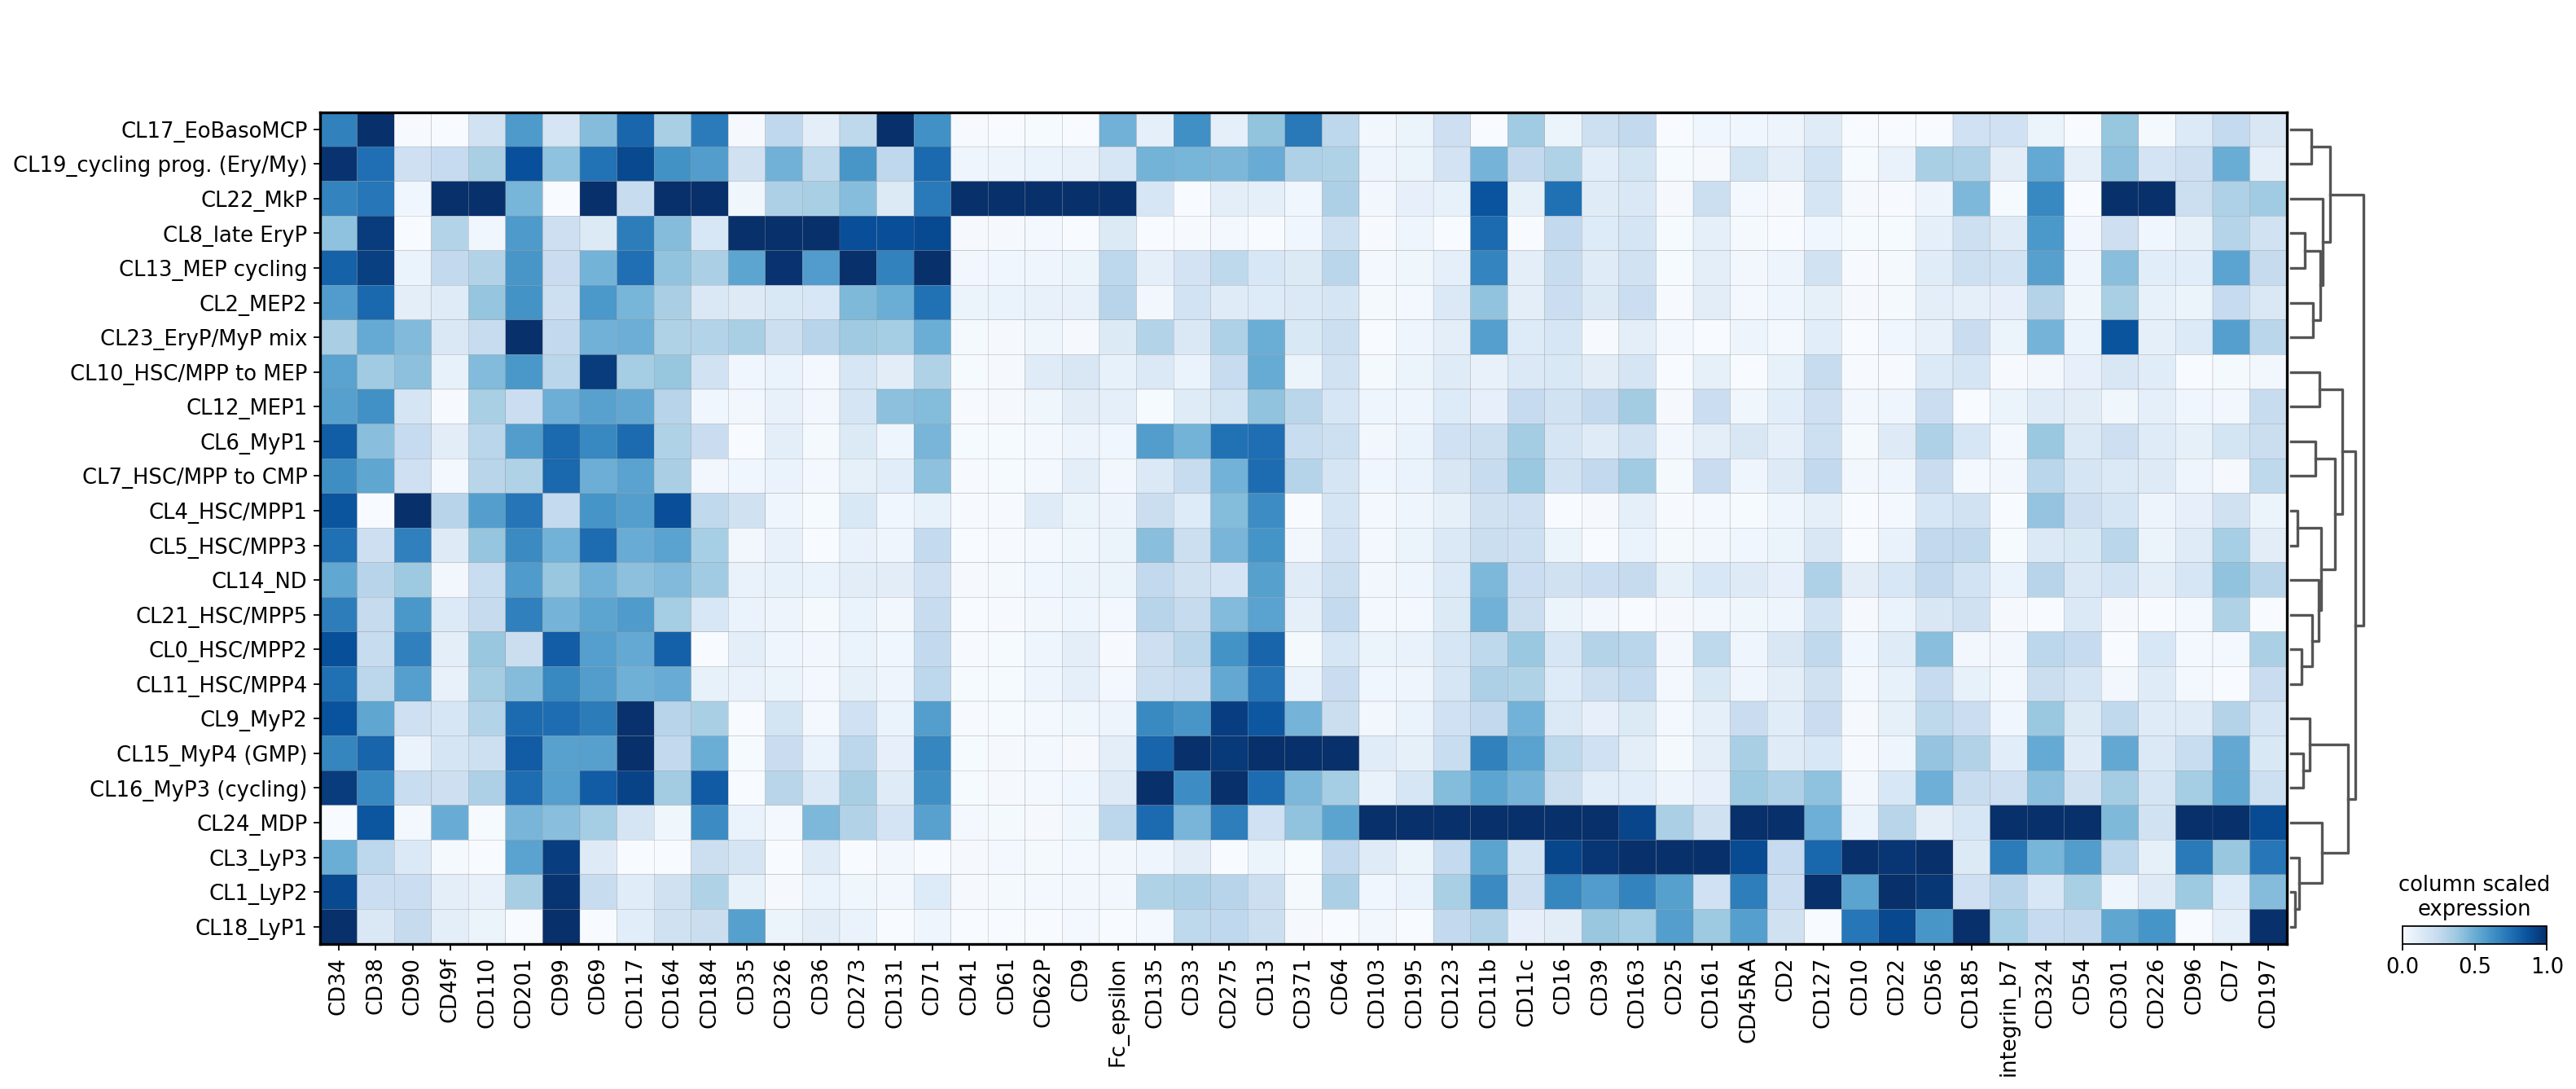

In [44]:
#sc.tl.dendrogram(DSB_output0, groupby= 'Annotations.1.2.sorted')
sc.pl.matrixplot(DSB_output0, list(df["protein marker"]), groupby= 'Annotations.1.2', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression', save="-120221_DSB_normalised_dendogram_BM-SPL")

In [47]:
DSB_output0.write("h5ad_part3/20210119_Laurenti_mq224_ADTonmRNA_postQC_filtered_DSB_UMAPpaper_BM_SPL_SIGAB11_SIGAD11.h5ad")

In [48]:
prots=["CD71", "CD36", "CD131", "CD326", "CD33", "CD371", "CD135", "CD41", "CD110", "CD90", "CD38", "CD49f", "CD45RA", "CD110"]

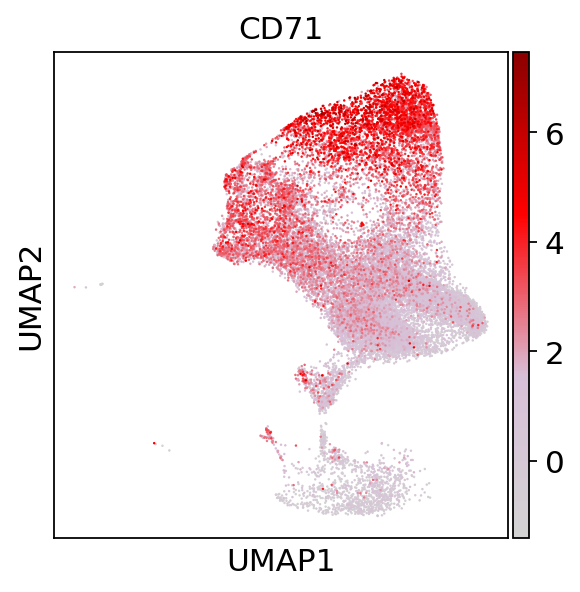

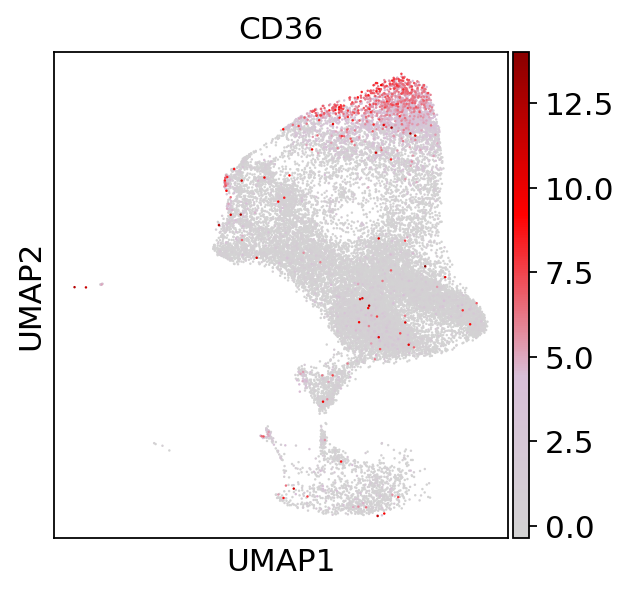

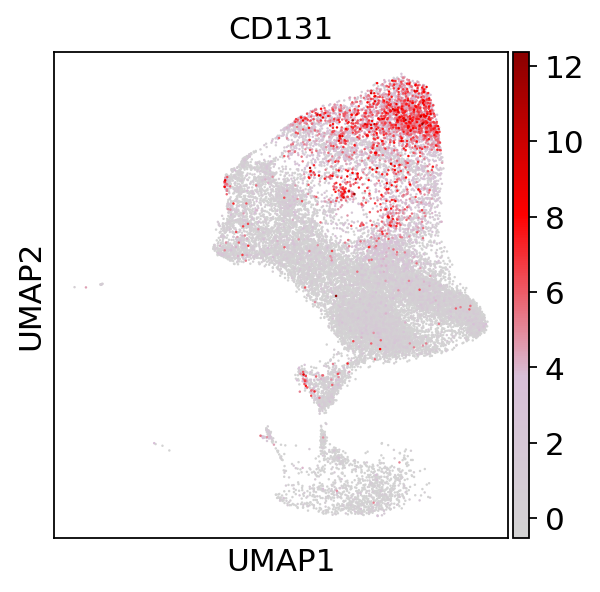

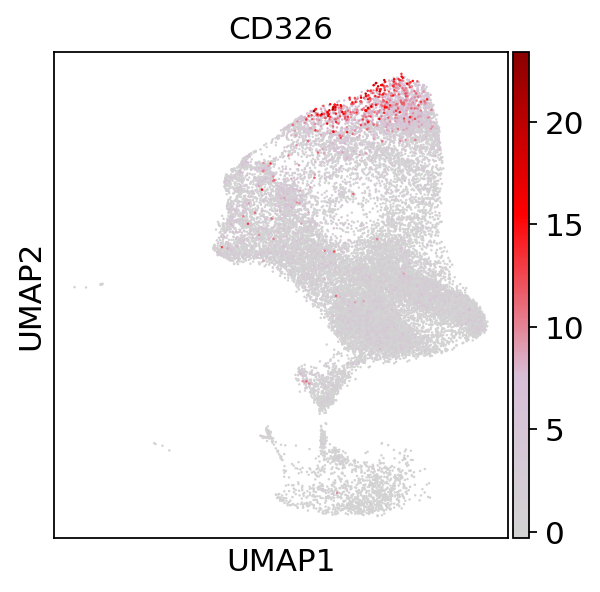

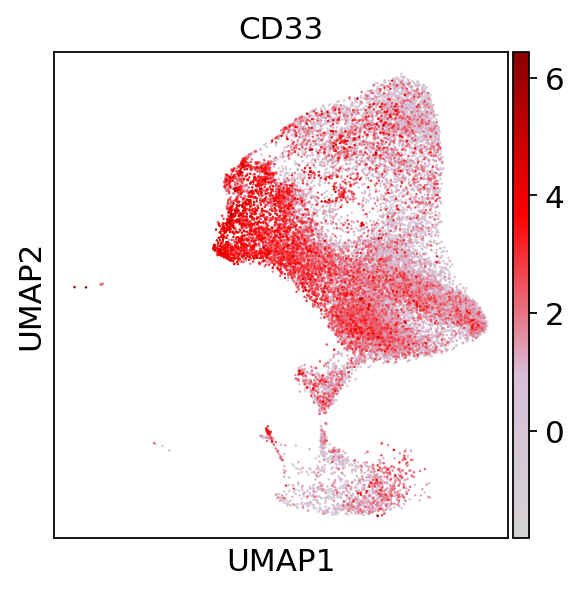

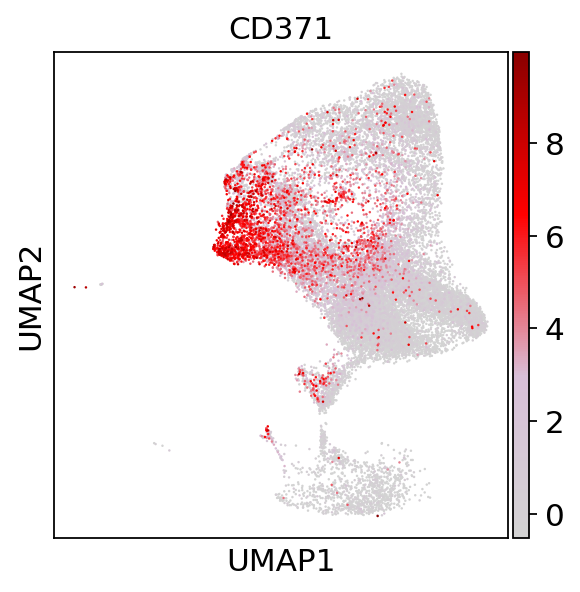

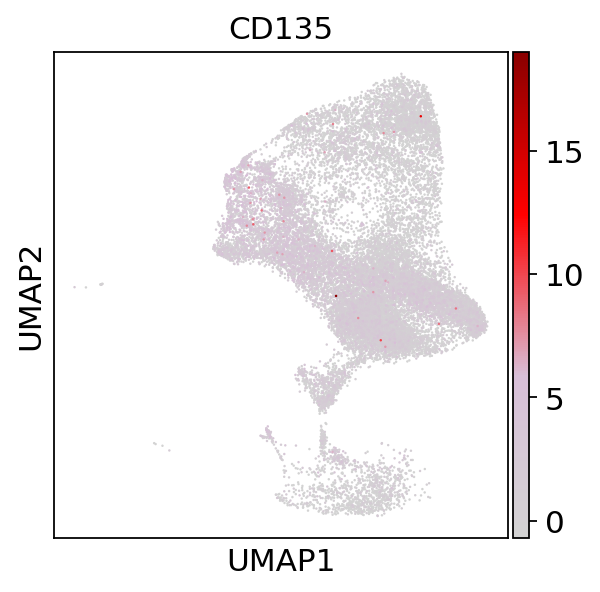

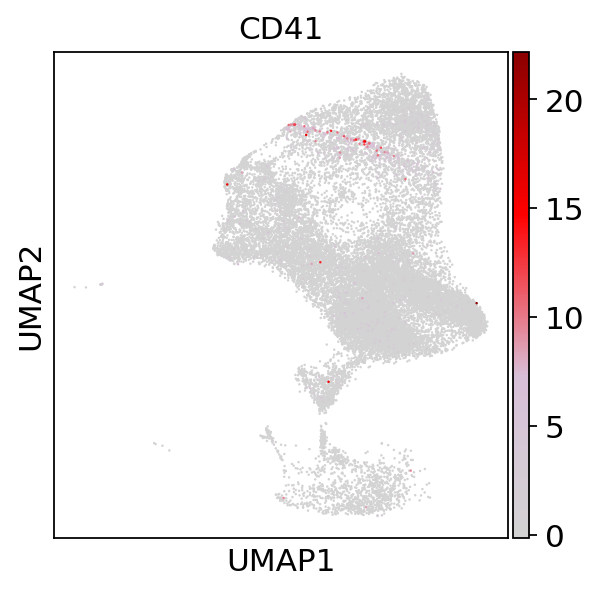

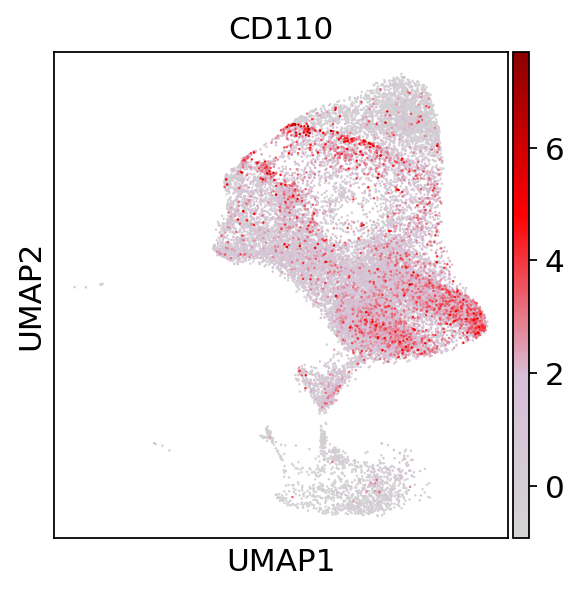

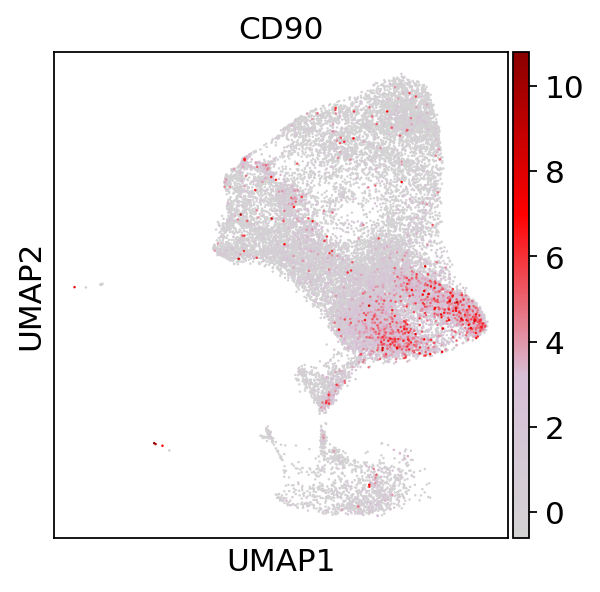

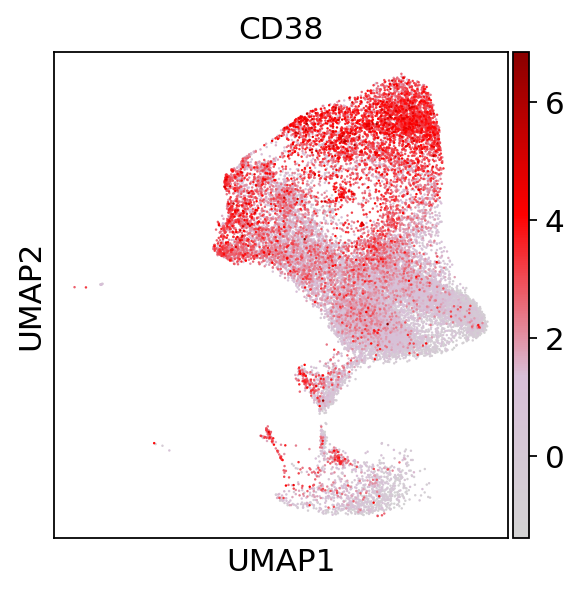

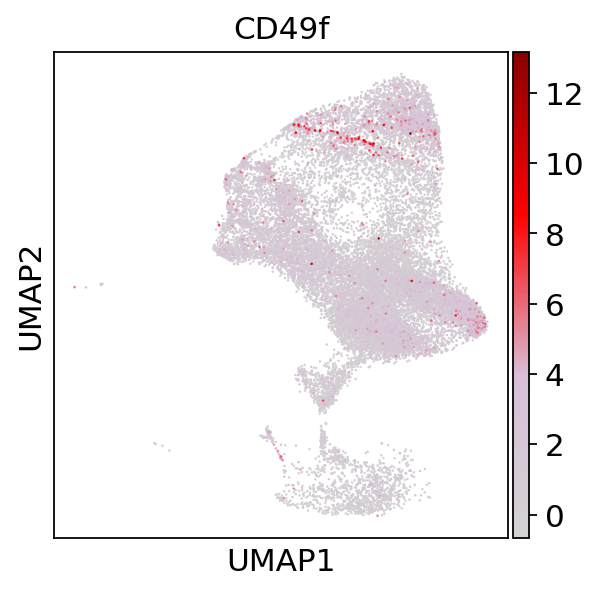

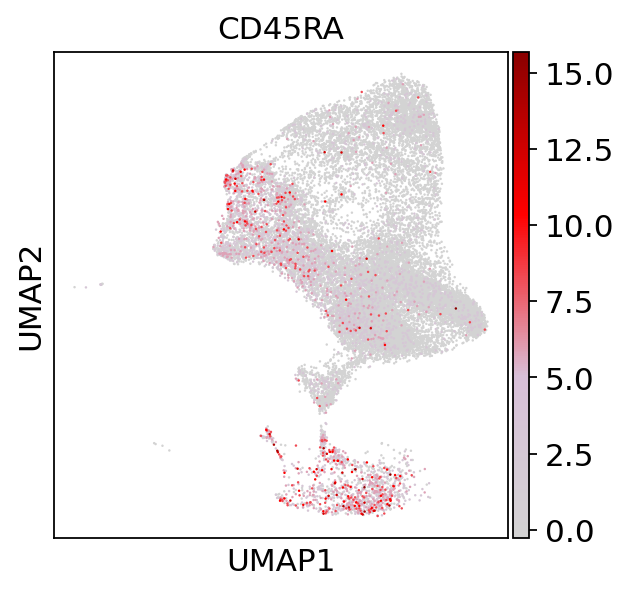

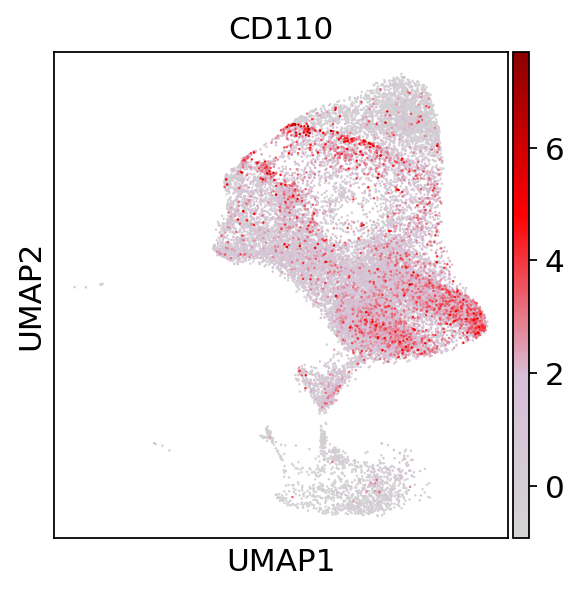

In [49]:
for prot in prots:
    sc.pl.umap(DSB_output0, color=prot, ncols=5, wspace = 0.5,cmap=cmap, save=prot+"-120221_DSB_normalised_UMAPs_BM-SPL-cmap")



In [4]:
DSB_output0 = sc.read("h5ad_part3/20210119_Laurenti_mq224_ADTonmRNA_postQC_filtered_DSB_UMAPpaper_BM_SPL_SIGAB11_SIGAD11.h5ad")